In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install h5py==2.10.0
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6

Found existing installation: tensorflow 1.15.0
Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [ ]:
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [ ]:
labels=np.asarray(df.v1)
texts=np.asarray(df.v2).astype('<U910')
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
maxlen = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
df = pad_sequences(sequences, maxlen=maxlen)
np.random.seed(42)

indices = np.arange(df.shape[0])
np.random.shuffle(indices)
df = df[indices]
clases = labels[indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, clases, test_size=0.2, shuffle=True)

In [ ]:
max_features = 10000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_rnn = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.16) 

Train on 3743 samples, validate on 714 samples
Epoch 1/10
3743/3743 [==============================] - 7s 2ms/step - loss: 0.3962 - acc: 0.8712 - val_loss: 0.2100 - val_acc: 0.9454
Epoch 2/10
3743/3743 [==============================] - 6s 2ms/step - loss: 0.1155 - acc: 0.9749 - val_loss: 0.0715 - val_acc: 0.9846
Epoch 3/10
3743/3743 [==============================] - 6s 2ms/step - loss: 0.0487 - acc: 0.9896 - val_loss: 0.0664 - val_acc: 0.9846
Epoch 4/10
3743/3743 [==============================] - 6s 2ms/step - loss: 0.2569 - acc: 0.8883 - val_loss: 0.1519 - val_acc: 0.9440
Epoch 5/10
3743/3743 [==============================] - 6s 2ms/step - loss: 0.0786 - acc: 0.9778 - val_loss: 0.1233 - val_acc: 0.9706
Epoch 6/10
3743/3743 [==============================] - 6s 2ms/step - loss: 0.0437 - acc: 0.9893 - val_loss: 0.1229 - val_acc: 0.9608
Epoch 7/10
3743/3743 [==============================] - 6s 2ms/step - loss: 0.0265 - acc: 0.9960 - val_loss: 0.0895 - val_acc: 0.9776
Epoch 8/10
3743

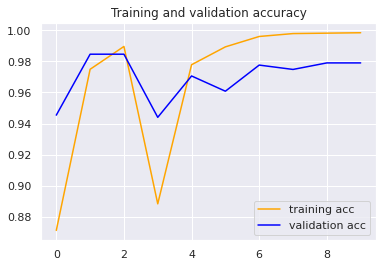

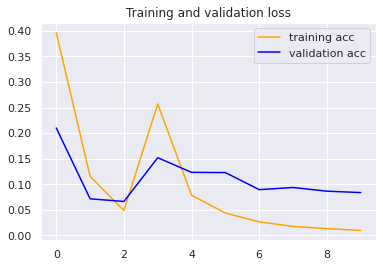

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
print("Test loss is {0:.5f} accuracy is {1:.5f}  ".format(acc[0],acc[1]))
cm = confusion_matrix(pred, y_test)

1115/1115 [==============================] - 1s 666us/step
Test loss is 0.07797 accuracy is 0.9793721978  


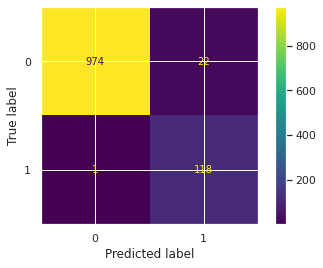

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
from sklearn import svm, metrics
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Precision:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))

Accuracy: 0.979372197309417
Precision: 0.9915966386554622
Recall: 0.8428571428571429


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
